### Load libraries and import data 

In [1]:
import numpy as np 
import pandas as pd 


import os


import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [3]:
Titan=pd.read_csv("Titan-Amazon Scrapping.csv",encoding='latin-1')
Titan.shape

(3594, 1)

In [4]:
Titan.head()

,reviews
0,"OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n"
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n
2,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n
3,"This review is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This message is not for customers but for CLOUDTAIL retailer. Dear CLOUDTAIL few years ago you had very good reputation and has over 95% postive feedback. Now is it is around 85%. All this because you are taking advantage of customer's trust. If you send Display items and showcase items rather than minted products, this is how you get the ratings. Change your priorities and make customers satisfied.So that people choose you over other sellers. People are not goats to follow blindly.\n"
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n


In [5]:
Titan['reviews'].value_counts()

Good\n                                                                                                                                                                                                                                               155
Nice\n                                                                                                                                                                                                                                               75 
Good product\n                                                                                                                                                                                                                                       41 
Nice watch\n                                                                                                                                                                                                                                         40 
Nice

In [6]:
(Titan['reviews'].value_counts()/Titan.shape[0])*100

Good\n                                                                                                                                                                                                                                               4.312743
Nice\n                                                                                                                                                                                                                                               2.086811
Good product\n                                                                                                                                                                                                                                       1.140790
Nice watch\n                                                                                                                                                                                                                                  

In [7]:
Titan['len_reviews']=Titan['reviews'].apply(lambda x:len(x.split()))

In [8]:
Titan.head()

,reviews,len_reviews
0,"OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n",67
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n,53
2,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n,30
3,"This review is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This message is not for customers but for CLOUDTAIL retailer. Dear CLOUDTAIL few years ago you had very good reputation and has over 95% postive feedback. Now is it is around 85%. All this because you are taking advantage of customer's trust. If you send Display items and showcase items rather than minted products, this is how you get the ratings. Change your priorities and make customers satisfied.So that people choose you over other sellers. People are not goats to follow blindly.\n",114
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n,14


In [9]:
Titan.describe()

,len_reviews
count,3594.000000
mean,10.888147
std,14.137363
min,0.000000
25%,2.000000
50%,6.000000
75%,14.000000
max,173.000000


Text(0.5, 1.0, ' Distribution of reviews')

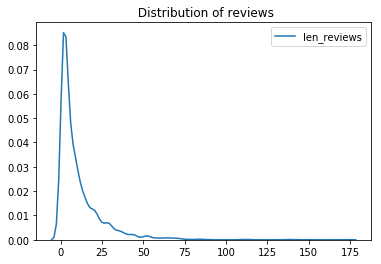

In [10]:
sns.kdeplot(Titan['len_reviews']).set_title(" Distribution of reviews")

In [11]:
Titan['len_reviews']

0       67 
1       53 
2       30 
3       114
4       14 
5       45 
6       8  
7       19 
8       38 
9       76 
10      67 
11      53 
12      30 
13      114
14      14 
15      45 
16      8  
17      19 
18      38 
19      76 
20      40 
21      42 
22      11 
23      83 
24      39 
25      36 
26      4  
27      67 
28      10 
29      11 
        .. 
3564    4  
3565    4  
3566    3  
3567    12 
3568    9  
3569    8  
3570    1  
3571    5  
3572    1  
3573    2  
3574    6  
3575    13 
3576    11 
3577    45 
3578    13 
3579    2  
3580    8  
3581    4  
3582    1  
3583    28 
3584    10 
3585    28 
3586    2  
3587    31 
3588    1  
3589    12 
3590    12 
3591    12 
3592    1  
3593    2  
Name: len_reviews, Length: 3594, dtype: int64

### STOP WORDS - removal of stopwords 

In [12]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

In [13]:
STOPWORDS=stopwords.words("english")

In [14]:
STOPWORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
test_doc="Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke"

## Remove punctuation
test_doc_cleaned="".join([x for x in test_doc if x not in string.punctuation])
test_doc_cleaned

'Really awesome productworth for money paybut i disappointed with boxits came with little broke'

In [16]:
## Lower case all words
test_doc_cleaned=test_doc_cleaned.lower()
test_doc_cleaned

'really awesome productworth for money paybut i disappointed with boxits came with little broke'

In [17]:
## Let us remove the stopwords
test_tokens=test_doc_cleaned.split(" ")
test_tokens=[token for token in test_tokens if token not in STOPWORDS]
test_tokens

['really',
 'awesome',
 'productworth',
 'money',
 'paybut',
 'disappointed',
 'boxits',
 'came',
 'little',
 'broke']

In [18]:
## Stem the words
from nltk.stem import PorterStemmer
ps = PorterStemmer() 
test_doc_cleaned=" ".join([ps.stem(token) for token in test_tokens])
test_doc_cleaned

'realli awesom productworth money paybut disappoint boxit came littl broke'

In [19]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    #remove extra white space
    
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    
    text_cleaned=re.sub(' +', ' ', text_cleaned)
    text_cleaned=text_cleaned.lower()
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS]
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned


print(clean_text(test_doc))

realli awesom product worth money pay disappoint box came littl broke


In [20]:
Titan.columns

Index(['reviews', 'len_reviews'], dtype='object')

In [21]:
corpus=Titan['reviews'].tolist()

In [22]:
corpus

['OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n',
 'The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n',
 'Nice watch...  Good finishing...  Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n',
 "This review  is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This 

In [23]:
Titan

,reviews,len_reviews
0,"OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n",67
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n,53
2,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n,30
3,"This review is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This message is not for customers but for CLOUDTAIL retailer. Dear CLOUDTAIL few years ago you had very good reputation and has over 95% postive feedback. Now is it is around 85%. All this because you are taking advantage of customer's trust. If you send Display items and showcase items rather than minted products, this is how you get the ratings. Change your priorities and make customers satisfied.So that people choose you over other sellers. People are not goats to follow blindly.\n",114
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n,14
5,I gifted this to my friend and within a few months it stopped working. The titan service person said the main part is not working and is asking her to pay Rs 500/-. This is very disappointing. Would defntly think twice before buying a titan.\n,45
6,.. happy with packing...New piece of product. :)\n,8
7,Lovely watch...dial is big enough...nice to wear..exactly same as shown in the picture..light weighted product..overall its a good product...\n,19
8,Worth every penny ..rich and elegent ...dial size was abt size for both thin and thick wrist ..no warranty details filled ..not sure whether u can claim with bill ... perfect .. got in a deal for 1700\n,38
9,Titan Youth Analog Black Dial Women's Watch - NE2480SM02Absolutely loved this watch.The dial size is correct unlike most women's watches which are pretty small. Looks classy and very elegant with all kinds of outfits. Perfect for office wear as well. I personally wear it everyday and must say its holding up pretty well. I am a rough user and this watch has held up against all the scratching and wear and tear.Best buy for this price.\n,76


### Sentiment  Analysis of Amazon reviews  for positive,negative and neutral reviews 

In [24]:
from nltk.sentiment import vader
from nltk.sentiment.util import *
import nltk
nltk.download('vader_lexicon')

from nltk import tokenize

sid = vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MYPC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
text=Titan['reviews']
text[0:10]

0    OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n                                                                                                                                                                                                                                                                                                                     
1    The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n                                             

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sid = vader.SentimentIntensityAnalyzer()

In [27]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [28]:
Titan['sentiment_compound_polarity']=Titan['reviews'].apply(lambda x:sid.polarity_scores(x)['compound'])
Titan['sentiment_negative']=Titan['reviews'].apply(lambda x:sid.polarity_scores(x)['neg'])
Titan['sentiment_pos']=Titan['reviews'].apply(lambda x:sid.polarity_scores(x)['pos'])
Titan['sentiment']=''
Titan.loc[Titan.sentiment_compound_polarity>=0,'sentiment']="positive"
Titan.loc[Titan.sentiment_compound_polarity==0,'sentiment']="neutral"

Titan.loc[Titan.sentiment_compound_polarity<0,'sentiment']="negative"
sid = vader.SentimentIntensityAnalyzer()

In [29]:
Titan.head()

,reviews,len_reviews,sentiment_compound_polarity,sentiment_negative,sentiment_pos,sentiment
0,"OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n",67,0.6146,0.064,0.108,positive
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n,53,-0.8338,0.161,0.000,negative
2,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n,30,0.6908,0.086,0.245,positive
3,"This review is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This message is not for customers but for CLOUDTAIL retailer. Dear CLOUDTAIL few years ago you had very good reputation and has over 95% postive feedback. Now is it is around 85%. All this because you are taking advantage of customer's trust. If you send Display items and showcase items rather than minted products, this is how you get the ratings. Change your priorities and make customers satisfied.So that people choose you over other sellers. People are not goats to follow blindly.\n",114,0.9641,0.000,0.164,positive
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n,14,-0.0552,0.280,0.220,negative


In [30]:
Titan['sentiment'].value_counts()

positive    2845
neutral     392 
negative    357 
Name: sentiment, dtype: int64

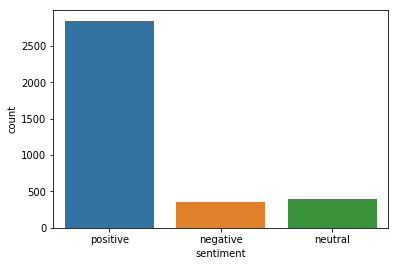

In [31]:
sns.countplot(Titan['sentiment'])

In [32]:
Titan[Titan['sentiment']=="negative"].head()

,reviews,len_reviews,sentiment_compound_polarity,sentiment_negative,sentiment_pos,sentiment
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n,53,-0.8338,0.161,0.000,negative
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n,14,-0.0552,0.280,0.220,negative
5,I gifted this to my friend and within a few months it stopped working. The titan service person said the main part is not working and is asking her to pay Rs 500/-. This is very disappointing. Would defntly think twice before buying a titan.\n,45,-0.3804,0.142,0.067,negative
11,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n,53,-0.8338,0.161,0.000,negative
14,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n,14,-0.0552,0.280,0.220,negative


#### Word cloud 

In [33]:
!pip install wordcloud 
#Run this if wordcloud library is not installed

In [34]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Word cloud builder  for frequent words 

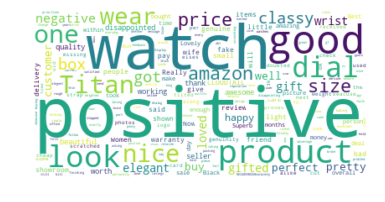

In [35]:
wordcloud = WordCloud(max_font_size=200, max_words=1000, background_color="white",collocations=False).generate(str(Titan))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("WordCloud_Unigrams_Titan-Amazon Scrapping.png")

In [36]:
Titan['cleaned_messages']=Titan['reviews'].apply(lambda x:clean_text(x))
Titan.head()

,reviews,len_reviews,sentiment_compound_polarity,sentiment_negative,sentiment_pos,sentiment,cleaned_messages
0,"OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n",67,0.6146,0.064,0.108,positive,ok watch light weight beacus doubt genuin next day took titan showroom check said genuin showroom price 2 3k price bought amazon warranti card miss along dun care genuin happi \n
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n,53,-0.8338,0.161,0.000,negative,watch look good receiv fake use old one watch scratch dial look alik cheap strap watch cut per somw one els wrist size see thw photo logo littl tilt prove fake one\n
2,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n,30,0.6908,0.086,0.245,positive,nice watch good finish look simpli eleg classi box watch bad iam disappoint got 1673 sale\n
3,"This review is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This message is not for customers but for CLOUDTAIL retailer. Dear CLOUDTAIL few years ago you had very good reputation and has over 95% postive feedback. Now is it is around 85%. All this because you are taking advantage of customer's trust. If you send Display items and showcase items rather than minted products, this is how you get the ratings. Change your priorities and make customers satisfied.So that people choose you over other sellers. People are not goats to follow blindly.\n",114,0.9641,0.000,0.164,positive,review product fact watch first class classi eleg look cute wrist bewar seller buy messag custom cloudtail retail dear cloudtail year ago good reput 95 postiv feedback now around 85 take advantag custom s trust send display item showcas item rather mint product rate chang prioriti make custom satisfi peopl choos seller peopl goat follow blindli \n
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n,14,-0.0552,0.280,0.220,negative,realli awesom product worth money pay disappoint box came littl broke\n


###  Unigram Word cloud builder for more frequent occurred words in the reviews

### Topic Modelling 

In [37]:
 ## Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
!pip install plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re

import gensim
from gensim import corpora

# libraries for visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

In [38]:
import string
def removePunct(text):
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub(r'[^\x00-\x7F]+',' ', text_cleaned) ## Remove Ascii Characters
    text_cleaned=re.sub('\s+', ' ', text_cleaned).strip()
    return text_cleaned

<>:7: DeprecationWarning:

invalid escape sequence \s

<>:7: DeprecationWarning:

invalid escape sequence \s

<>:7: DeprecationWarning:

invalid escape sequence \s

<ipython-input-38-7d387e9263d6>:7: DeprecationWarning:

invalid escape sequence \s



In [39]:
Titan=pd.read_csv("Titan-Amazon Scrapping.csv",encoding='utf-8')
Titan.head()

,reviews
0,"OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n"
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n
2,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n
3,"This review is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This message is not for customers but for CLOUDTAIL retailer. Dear CLOUDTAIL few years ago you had very good reputation and has over 95% postive feedback. Now is it is around 85%. All this because you are taking advantage of customer's trust. If you send Display items and showcase items rather than minted products, this is how you get the ratings. Change your priorities and make customers satisfied.So that people choose you over other sellers. People are not goats to follow blindly.\n"
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke\n


In [40]:
Titan=Titan[~pd.isnull(Titan['reviews'])]
Titan.shape
#dictionary = corpora.Dictionary(data['cleaned_noun_adj_review'].tolist())

(3594, 1)

In [41]:
corpus=Titan['reviews'].tolist()

In [42]:
corpus

['OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n',
 'The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n',
 'Nice watch...  Good finishing...  Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n',
 "This review  is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This 

In [43]:
tokenised_corpus=[]
for corp in corpus:
    
    tokenised_corpus.append([token for token in corp.split(" ")])
tokenised_corpus

[['OK..',
  'So',
  'this',
  'watch',
  'was',
  'very',
  'light',
  'weight',
  'beacuse',
  'of',
  'which',
  'I',
  'doubted',
  'its',
  'genuinity.',
  'So',
  'next',
  'day',
  'I',
  'took',
  'it',
  'to',
  'Titan',
  'showroom',
  'for',
  'a',
  'check.',
  'And',
  'they',
  'said',
  'its',
  'genuine',
  'and',
  'the',
  'showroom',
  'price',
  'itself',
  'is',
  '2.3k,the',
  'price',
  'for',
  'which',
  'I',
  'bought',
  'from',
  'amazon.',
  'And',
  'there',
  'was',
  'a',
  'warranty',
  'card',
  'missing',
  'along',
  'with',
  'it.',
  'But',
  'I',
  'dun',
  'care..',
  'Since',
  'its',
  'genuine!!',
  'I',
  'am',
  'so',
  'happy!\n'],
 ['The',
  'watch',
  'looks',
  'good..but',
  'I',
  'received',
  'a',
  'fake',
  'and',
  'used',
  'and',
  'old',
  'one..the',
  'watch',
  'was',
  'scratched',
  'and',
  'the',
  'dial',
  'was',
  'look',
  'alike',
  'but',
  'cheap...the',
  'strap',
  'of',
  'the',
  'watch',
  'was',
  'cut',
  'a

In [44]:
dictionary = corpora.Dictionary(tokenised_corpus)

In [45]:
len(dictionary)

5437

In [46]:
dictionary[0]

'2.3k,the'

In [47]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenised_corpus]

In [48]:
doc_term_matrix[3] ##(14,2) => word place has occurred twice

[(2, 1),
 (12, 4),
 (21, 2),
 (22, 1),
 (27, 6),
 (28, 1),
 (35, 2),
 (40, 3),
 (43, 2),
 (44, 1),
 (46, 3),
 (49, 1),
 (57, 1),
 (80, 1),
 (85, 1),
 (104, 1),
 (105, 1),
 (106, 1),
 (107, 2),
 (108, 1),
 (109, 1),
 (110, 1),
 (111, 1),
 (112, 1),
 (113, 1),
 (114, 1),
 (115, 1),
 (116, 1),
 (117, 2),
 (118, 1),
 (119, 1),
 (120, 1),
 (121, 2),
 (122, 1),
 (123, 1),
 (124, 1),
 (125, 1),
 (126, 1),
 (127, 1),
 (128, 1),
 (129, 1),
 (130, 1),
 (131, 2),
 (132, 1),
 (133, 1),
 (134, 1),
 (135, 1),
 (136, 1),
 (137, 1),
 (138, 1),
 (139, 1),
 (140, 1),
 (141, 1),
 (142, 1),
 (143, 1),
 (144, 1),
 (145, 2),
 (146, 1),
 (147, 1),
 (148, 1),
 (149, 3),
 (150, 1),
 (151, 1),
 (152, 2),
 (153, 1),
 (154, 1),
 (155, 1),
 (156, 1),
 (157, 1),
 (158, 1),
 (159, 1),
 (160, 1),
 (161, 1),
 (162, 1),
 (163, 1),
 (164, 1),
 (165, 1),
 (166, 1),
 (167, 1),
 (168, 1),
 (169, 1),
 (170, 1),
 (171, 1),
 (172, 1),
 (173, 1),
 (174, 6),
 (175, 1)]

In [49]:
dictionary[44]

'to'

In [50]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=100, passes=50)

In [51]:
lda_model.print_topics()

[(0,
  '0.055*"the" + 0.047*"is" + 0.022*"watch" + 0.021*"and" + 0.020*"not" + 0.020*"was" + 0.019*"of" + 0.017*"in" + 0.015*"a" + 0.015*"to"'),
 (1,
  '0.038*"for" + 0.032*"and" + 0.028*"my" + 0.027*"I" + 0.027*"it" + 0.022*"to" + 0.019*"very" + 0.018*"a" + 0.017*"this" + 0.016*"Nice"'),
 (2,
  '0.027*"Very" + 0.020*"warranty" + 0.015*"nice\n" + 0.014*"good\n" + 0.013*"Nice\n" + 0.013*"great" + 0.011*"Best" + 0.010*"Great" + 0.010*"any" + 0.010*"card"'),
 (3,
  '0.060*"Good" + 0.034*"Good\n" + 0.024*"it\n" + 0.023*"for" + 0.016*"money\n" + 0.015*"." + 0.011*"amazon" + 0.010*"Value" + 0.008*"Looking" + 0.007*"2"')]

In [52]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\MYPC\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.215582 -0.095795  1       1        45.142891
1      0.182637  0.105156  2       1        36.333519
2     -0.197887 -0.175582  3       1        9.483254 
3     -0.200332  0.166220  4       1        9.040336 , topic_info=     Category         Freq         Term        Total  loglift  logprob
21    Default  621.000000   for          621.000000   30.0000  30.0000
40    Default  1053.000000  the          1053.000000  29.0000  29.0000
88    Default  212.000000   Good         212.000000   28.0000  28.0000
198   Default  405.000000   my           405.000000   27.0000  27.0000
27    Default  925.000000   is           925.000000   26.0000  26.0000
684   Default  259.000000   Very         259.000000   25.0000  25.0000
980   Default  123.000000   Good\n       123.000000   24.0000  24.0000
149   Default  355.000000   not          355.000000   23.0000  23.0000
35    Default  338.000000   of           338.000000   22.0000  22.0000
91    Default  231.000000   Nice         231.000000   21.0000  21.0000
3     Default  522.000000   I            522.000000   20.0000  20.0000
432   Default  87.000000    it\n         87.000000    19.0000  19.0000
12    Default  837.000000   and          837.000000   18.0000  18.0000
352   Default  197.000000   nice         197.000000   17.0000  17.0000
28    Default  645.000000   it           645.000000   16.0000  16.0000
47    Default  73.000000    warranty     73.000000    15.0000  15.0000
53    Default  227.000000   The          227.000000   14.0000  14.0000
57    Default  201.000000   but          201.000000   13.0000  13.0000
46    Default  394.000000   very         394.000000   12.0000  12.0000
313   Default  152.000000   gift         152.000000   11.0000  11.0000
756   Default  186.000000   product\n    186.000000   10.0000  10.0000
44    Default  580.000000   to           580.000000   9.0000   9.0000 
270   Default  168.000000   loved        168.000000   8.0000   8.0000 
1024  Default  57.000000    nice\n       57.000000    7.0000   7.0000 
1134  Default  56.000000    money\n      56.000000    6.0000   6.0000 
48    Default  430.000000   was          430.000000   5.0000   5.0000 
924   Default  55.000000    .            55.000000    4.0000   4.0000 
43    Default  327.000000   this         327.000000   3.0000   3.0000 
949   Default  51.000000    good\n       51.000000    2.0000   2.0000 
790   Default  124.000000   watch\n      124.000000   1.0000   1.0000 
149   Topic1   354.483032   not          355.118103   0.7935  -3.9147 
35    Topic1   337.645874   of           338.289124   0.7934  -3.9634 
53    Topic1   226.908737   The          227.554703   0.7925  -4.3608 
57    Topic1   200.422806   but          201.058411   0.7922  -4.4850 
756   Topic1   185.569427   product\n    186.224472   0.7918  -4.5620 
403   Topic1   110.401955   be           111.083710   0.7892  -5.0813 
80    Topic1   102.940063   that         103.578812   0.7892  -5.1513 
7     Topic1   102.587944   Titan        103.247627   0.7889  -5.1547 
102   Topic1   93.565231    too          94.205681    0.7885  -5.2467 
60    Topic1   92.076347    dial         92.713867    0.7884  -5.2628 
169   Topic1   90.281593    than         90.927010    0.7882  -5.2825 
93    Topic1   87.018326    box          87.654671    0.7881  -5.3193 
259   Topic1   77.910721    Watch        78.550423    0.7872  -5.4298 
2     Topic1   74.013115    But          74.645668    0.7868  -5.4812 
539   Topic1   74.115944    Product      74.756569    0.7867  -5.4798 
224   Topic1   71.415154    shown        72.043182    0.7866  -5.5169 
499   Topic1   76.764000    by           77.468216    0.7862  -5.4447 
121   Topic1   65.737312    are          66.381508    0.7856  -5.5997 
75    Topic1   63.300110    received     63.960590    0.7850  -5.6375 
353   Topic1   64.610237    no           65.287666    0.7849  -5.6170 
209   Topic1

In [53]:
def plotMostCommonWords(reviews_list,topn=50,title="Positive Review",color="blue",axis=None):
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.Titan()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

In [54]:
from collections import Counter

In [55]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [56]:
Titan['reviews']=Titan['reviews'].apply(lambda x:x.strip('\n'))   ### To remove spaces from every reviews 

In [57]:
Titan.head()

,reviews
0,"OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!"
1,The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one
2,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale
3,"This review is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you buy. This message is not for customers but for CLOUDTAIL retailer. Dear CLOUDTAIL few years ago you had very good reputation and has over 95% postive feedback. Now is it is around 85%. All this because you are taking advantage of customer's trust. If you send Display items and showcase items rather than minted products, this is how you get the ratings. Change your priorities and make customers satisfied.So that people choose you over other sellers. People are not goats to follow blindly."
4,Really awesome product.....worth for money pay....but i disappointed with box....its came with little broke


### Cleaning of reviews 

In [58]:
Titan['cleaned_reviews']=Titan['reviews'].apply(lambda x:clean_text(x))

In [59]:
Titan.sample(10)

,reviews,cleaned_reviews
2767,Nice,nice
641,Nice watch,nice watch
3214,Item belt diferent,item belt difer
1102,Cool,cool
3175,Amazing watch. Gives a professional and elegant look. Suits with all skin tones.,amaz watch give profession eleg look suit skin tone
3183,same as in photo. i liked it.,photo like
2375,Excellent item.....,excel item
344,very nice good looking watch....its more beautiful thn this picture on the amazon,nice good look watch beauti thn pictur amazon
792,Awesome 😍,awesom 😍
2574,Perfect!,perfect


## Word cloud for most frequent words 

Text(0.5, 1.0, 'Most common words in the reviews')

(-0.5, 1999.5, 1999.5, -0.5)

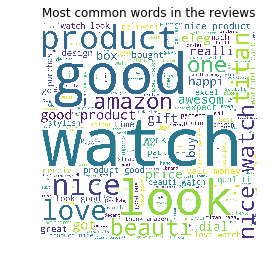

In [60]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(Titan['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [61]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [62]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [63]:
Titan['sentiment_score']=Titan['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [64]:
Titan.sample(5)

,reviews,cleaned_reviews,sentiment_score
1559,Nice watch.. Value for money,nice watch valu money,0.6369
169,I have orderd women watch but inside its a Men watch,orderd women watch insid men watch,0.0000
3309,Awesome 👌👌👌👌👌,awesom 👌👌👌👌👌,0.6249
502,"Beautiful watch,sleek dial and excellent gold finish.Strap design is delicate and elegant,yet sturdy.Bought it on discount and was a steal.",beauti watch sleek dial excel gold finish strap design delic eleg yet sturdi bought discount steal,0.6808
3173,So classy 😍I loved it though it is quite big in size for my hand😅,classi 😍i love though quit big size hand😅,0.8104


In [65]:
 def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [66]:
Titan['review_category']=Titan['sentiment_score'].apply(lambda x:sentiment_category(x))

In [67]:
Titan.sample(5)

,reviews,cleaned_reviews,sentiment_score,review_category
2509,Totally elegant and beautiful watch,total eleg beauti watch,0.8204,positive
3174,Just love this watch. It looks super classy. Every girl should have it. Just love the way it looks on my hand. Even price is quite affordable and it goes with everything.,love watch look super classi everi girl love way look hand even price quit afford goe everyth,0.9607,positive
772,Good ND stylish,good nd stylish,0.4404,positive
33,Awesome.same as seen.in love with it.suits with All outfits,awesom seen love suit outfit,0.6369,positive
1109,It's very attractive,s attract,0.4927,positive


In [68]:
positive_reviews=Titan.loc[Titan['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]


['ok watch light weight beacus doubt genuin next day took titan showroom check said genuin showroom price 2 3k price bought amazon warranti card miss along dun care genuin happi ',
 'review product fact watch first class classi eleg look cute wrist bewar seller buy messag custom cloudtail retail dear cloudtail year ago good reput 95 postiv feedback now around 85 take advantag custom s trust send display item showcas item rather mint product rate chang prioriti make custom satisfi peopl choos seller peopl goat follow blindli ',
 ' happi pack new piec product ',
 'love watch dial big enough nice wear exactli shown pictur light weight product overal good product ',
 'worth everi penni rich eleg dial size abt size thin thick wrist warranti detail fill sure whether u claim bill perfect got deal 1700']

In [69]:
negative_reviews=Titan.loc[Titan['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['watch look good receiv fake use old one watch scratch dial look alik cheap strap watch cut per somw one els wrist size see thw photo logo littl tilt prove fake one',
 'nice watch good finish look simpli eleg classi box watch bad iam disappoint got 1673 sale',
 'realli awesom product worth money pay disappoint box came littl broke',
 'gift friend within month stop work titan servic person said main part work ask pay rs 500 disappoint defntli think twice buy titan ',
 'watch look good receiv fake use old one watch scratch dial look alik cheap strap watch cut per somw one els wrist size see thw photo logo littl tilt prove fake one']

### Building wordcloud for positive reviews 

Text(0.5, 1.0, 'Most common words in positive customer comments')

(-0.5, 1999.5, 1999.5, -0.5)

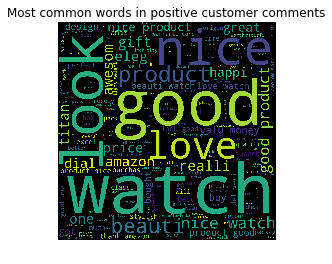

In [70]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(Titan.loc[Titan['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()


### Building wordcloud for negative reviews 

Text(0.5, 1.0, 'Most common words in negative customer comments')

(-0.5, 1999.5, 1999.5, -0.5)

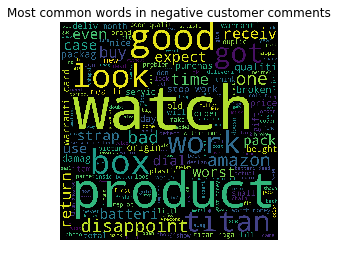

In [71]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(Titan.loc[Titan['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

In [72]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [73]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [74]:
top_20_positive_review_words

[('', 1040),
 ('watch', 1030),
 ('good', 927),
 ('product', 693),
 ('nice', 643),
 ('look', 536),
 ('love', 400),
 ('gift', 312),
 ('beauti', 256),
 ('s', 212),
 ('amazon', 195),
 ('one', 187),
 ('titan', 181),
 ('awesom', 174),
 ('dial', 168),
 ('eleg', 166),
 ('price', 165),
 ('money', 141),
 ('realli', 139),
 ('great', 135)]

In [75]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [76]:
top_20_negative_review_words

[('watch', 236),
 ('', 169),
 ('product', 144),
 ('good', 70),
 ('work', 65),
 ('titan', 64),
 ('box', 61),
 ('look', 56),
 ('t', 42),
 ('got', 41),
 ('disappoint', 38),
 ('warranti', 38),
 ('one', 37),
 ('amazon', 36),
 ('bad', 35),
 ('qualiti', 34),
 ('s', 33),
 ('buy', 31),
 ('batteri', 30),
 ('time', 30)]

In [77]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

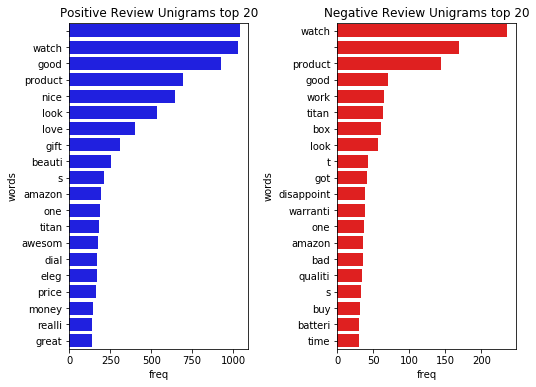

In [78]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

### the above bar plots shows the unigrams for positive reviews for most frequent words like watch,good,product,nice... for negative reviews like work,watch,...

#### BIgrams 

In [79]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [80]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [81]:
positive_reviews_bigrams[:5]

['ok_watch watch_light light_weight weight_beacus beacus_doubt doubt_genuin genuin_next next_day day_took took_titan titan_showroom showroom_check check_said said_genuin genuin_showroom showroom_price price_2 2_3k 3k_price price_bought bought_amazon amazon_warranti warranti_card card_miss miss_along along_dun dun_care care_genuin genuin_happi happi_',
 'review_product product_fact fact_watch watch_first first_class class_classi classi_eleg eleg_look look_cute cute_wrist wrist_bewar bewar_seller seller_buy buy_messag messag_custom custom_cloudtail cloudtail_retail retail_dear dear_cloudtail cloudtail_year year_ago ago_good good_reput reput_95 95_postiv postiv_feedback feedback_now now_around around_85 85_take take_advantag advantag_custom custom_s s_trust trust_send send_display display_item item_showcas showcas_item item_rather rather_mint mint_product product_rate rate_chang chang_prioriti prioriti_make make_custom custom_satisfi satisfi_peopl peopl_choos choos_seller seller_peopl peo

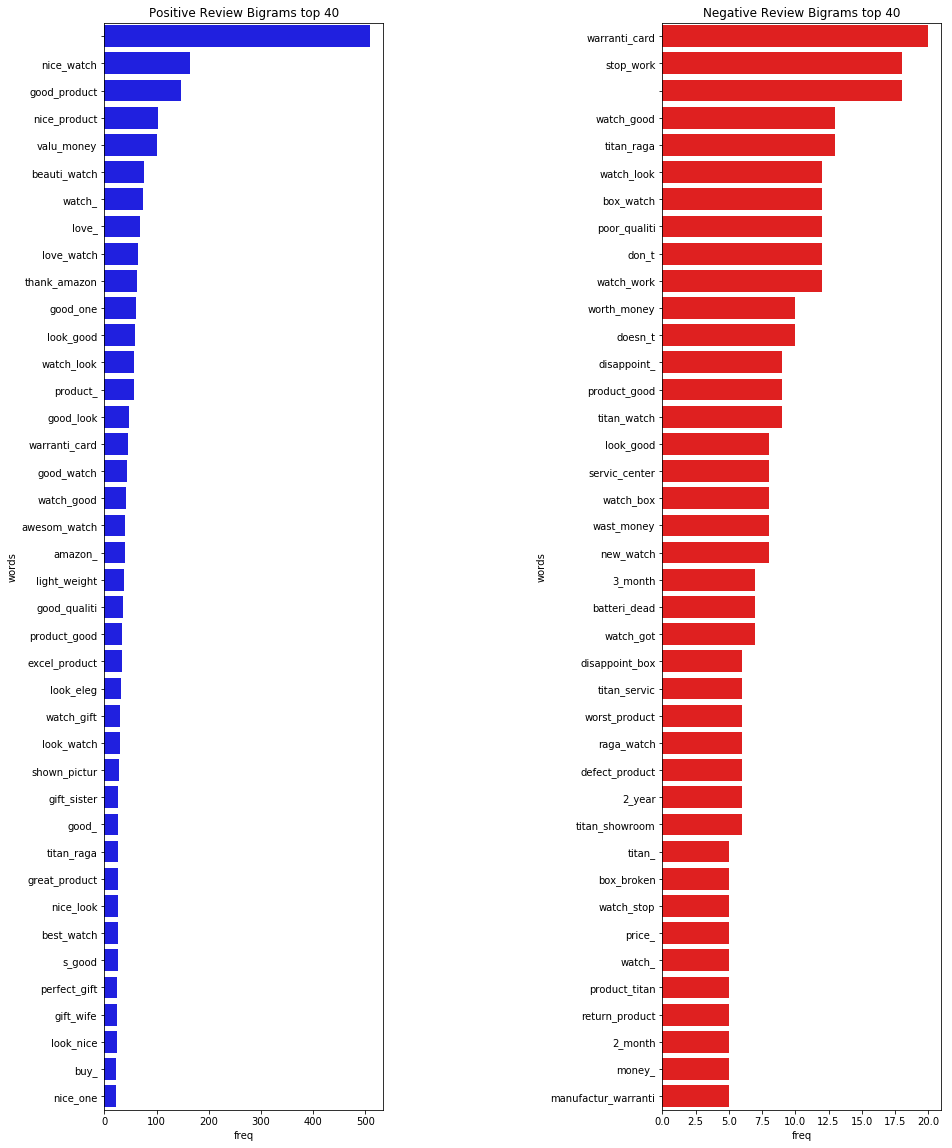

In [82]:

rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

#### The above bar plots shows the most frequent bigrams for positive reviews like nice_one,nice_watch,good_product,nice_product... For negative bigrams like warranti_card,stop_work..

In [83]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('max_colwidth', 100)


In [84]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# add stemming and lemmatisation in the preprocess function
def preprocess(len_reviews):
    'changes document to lower case and removes stopwords'

    # tokenize into words
    words = word_tokenize(len_reviews)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # stem
    #words = [stemmer.stem(word) for word in words]
    
    # join words to make sentence
    Titan = " ".join(words)
    
    return len_reviews

### TF-IDF

In [85]:
Titan = pd.read_csv("Titan-Amazon Scrapping.csv", sep = "\t", names=["reviews", "len_reviews"])
Titan.head()

,reviews,len_reviews
0,reviews,NaN
1,OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I...,NaN
2,The watch looks good..but I received a fake and used and old one..the watch was scratched and th...,NaN
3,Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch ...,NaN
4,This review is not about the product. In fact the watch is first class. Its very classy and ele...,NaN


In [86]:
Titan = Titan.iloc[0:50,:]
print(Titan)

                                                                                                reviews  \
0                                                                                               reviews   
1   OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I...   
2   The watch looks good..but I received a fake and used and old one..the watch was scratched and th...   
3   Nice watch...  Good finishing...  Look simply elegant and classy.... But the box with the watch ...   
4   This review  is not about the product. In fact the watch is first class. Its very classy and ele...   
5   Really awesome product.....worth for money pay....but i disappointed with box....its came with l...   
6   I gifted this to my friend and within a few months it stopped working. The titan service person ...   
7                                                    .. happy with packing...New piece of product. :)\n   
8   Lovely watch...dial is big enough

In [87]:
reviews = [reviews for reviews in Titan.reviews]
print(reviews)

['reviews', 'OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n', 'The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n', 'Nice watch...  Good finishing...  Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n', "This review  is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you bu

In [88]:
reveiws = [preprocess(reviews) for reviews in reviews]
print(reviews)

['reviews', 'OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I took it to Titan showroom for a check. And they said its genuine and the showroom price itself is 2.3k,the price for which I bought from amazon. And there was a warranty card missing along with it. But I dun care.. Since its genuine!! I am so happy!\n', 'The watch looks good..but I received a fake and used and old one..the watch was scratched and the dial was look alike but cheap...the strap of the watch was cut as per somw one elses wrist size....see thw photos..and the logo was also a little tilted....it proves that it is a fake one\n', 'Nice watch...  Good finishing...  Look simply elegant and classy.... But the box with the watch was too bad... Iam disappointed with it.but I got this for 1673/- ..in a sale\n', "This review  is not about the product. In fact the watch is first class. Its very classy and elegant. Looks very cute on wrist. But beware of seller from whom you bu

In [89]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(reviews)

In [90]:
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())
tfidf

,1673,1700,2000,2200,30,3k,400,500,85,95,about,absolutely,abt,account,actually,add,adjust,advantage,against,ago,ain,alike,all,almost,along,already,also,am,amazing,amazon,an,analog,and,anniversary,another,any,applicable,are,around,as,asking,at,available,awesome,back,bad,band,bank,be,beacuse,beautiful,because,been,before,belt,best,better,beware,big,bill,bit,black,blindly,both,bother,bought,box,break,broke,broken,brought,budget,but,buy,buying,by,came,can,card,care,case,casual,chain,change,cheap,check,checked,choose,claim,class,classy,cloudtail,color,comes,complaint,considering,contained,cool,copy,correct,cost,creats,customer,customers,cut,cute,cutting,dark,daughter,day,deal,dear,deducting,defntly,delivered,design,details,dial,dials,diameter,did,didn,disappointed,disappointing,disappoints,disatisfied,display,diwali,do,does,doesn,done,dont,doubted,dun,duplicate,durability,during,easily,easy,effectively,elegant,elegent,elses,enough,even,every,everyday,exact,exactly,examined,expect,expectations,expected,extemely,exterior,extremely,fact,fake,fashion,feedback,feel,few,fill,filled,fine,finish,finishing,first,fit,follow,for,formal,friend,from,gave,genuine,genuinity,get,gf,gift,gifted,gifting,gives,giving,glass,glossy,go,goats,good,got,gray,great,grip,had,hand,happy,has,heavy,held,hence,her,highly,holding,hope,how,iam,if,impact,impression,in,is,it,item,items,its,itself,just,keeping,kept,kinds,knew,large,later,level,light,like,liked,likes,little,lock,logo,long,look,looks,love,loved,lovely,low,main,make,makes,manufacturing,mark,marriage,me,meet,message,metal,minimalist,minor,minted,missing,mm,mom,money,months,most,mother,much,must,my,ne2480sm02absolutely,never,new,next,nice,no,not,noticed,now,of,office,ok,old,on,one,only,or,ordered,original,other,others,our,out,outfits,over,overall,package,packaging,packing,paid,parents,part,pay,penny,people,per,perfect,person,personally,photos,picture,piece,plastic,pleased,point,poor,post,postive,preety,premium,pretty,price,priorities,problem,product,products,proves,provided,purchase,purchased,quality,quite,rate,rather,ratings,read,really,receive,received,rejected,relationship,replace,reputation,retailer,return,review,reviews,rich,rough,royal,rs,said,sale,same,satisfactory,satisfied,say,scratch,scratched,scratching,see,seen,segment,selected,seller,sellers,send,sent,service,she,shop,showcase,shown,showroom,silver,similar,simple,simply,since,sister,size,small,snap,so,somw,stainless,stamp,star,steel,still,stopped,strap,strip,such,suggest,suits,superb,sure,surely,swaggey,take,taking,tear,than,that,the,there,they,thick,thin,thing,think,this,though,thw,ti,tilted,time,titan,to,too,took,totally,transparent,trust,twice,two,ultimately,undoubtedly,unique,unlike,up,upto,use,used,useless,user,using,value,very,visit,warranty,warrenty,was,wasn,waste,watch,watches,wear,wears,wedding,weight,weighted,well,when,whether,which,whom,wife,will,wise,with,within,women,working,works,worth,would,wrist,wrists,wrong,year,years,you,your,youth
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [91]:
print(vectorizer.get_feature_names())

['1673', '1700', '2000', '2200', '30', '3k', '400', '500', '85', '95', 'about', 'absolutely', 'abt', 'account', 'actually', 'add', 'adjust', 'advantage', 'against', 'ago', 'ain', 'alike', 'all', 'almost', 'along', 'already', 'also', 'am', 'amazing', 'amazon', 'an', 'analog', 'and', 'anniversary', 'another', 'any', 'applicable', 'are', 'around', 'as', 'asking', 'at', 'available', 'awesome', 'back', 'bad', 'band', 'bank', 'be', 'beacuse', 'beautiful', 'because', 'been', 'before', 'belt', 'best', 'better', 'beware', 'big', 'bill', 'bit', 'black', 'blindly', 'both', 'bother', 'bought', 'box', 'break', 'broke', 'broken', 'brought', 'budget', 'but', 'buy', 'buying', 'by', 'came', 'can', 'card', 'care', 'case', 'casual', 'chain', 'change', 'cheap', 'check', 'checked', 'choose', 'claim', 'class', 'classy', 'cloudtail', 'color', 'comes', 'complaint', 'considering', 'contained', 'cool', 'copy', 'correct', 'cost', 'creats', 'customer', 'customers', 'cut', 'cute', 'cutting', 'dark', 'daughter', 'd

In [92]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)
    

In [93]:
from collections import Counter 

In [94]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [95]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()


In [96]:
lda_model[doc_term_matrix[1]]

[(0, 0.92793167), (1, 0.06263298)]

In [97]:
lda_model.show_topic(3)

[('Good', 0.059566766),
 ('Good\n', 0.034378488),
 ('it\n', 0.024443997),
 ('for', 0.022696849),
 ('money\n', 0.015558455),
 ('.', 0.015363064),
 ('amazon', 0.011057521),
 ('Value', 0.010399506),
 ('Looking', 0.008247357),
 ('2', 0.007296691)]

In [98]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5741,"for, and, my, I, it, to, very, a, this, Nice",OK.. So this watch was very light weight beacuse of which I doubted its genuinity. So next day I...
1,1,0.0,0.9279,"the, is, watch, and, not, was, of, in, a, to",The watch looks good..but I received a fake and used and old one..the watch was scratched and th...
2,2,1.0,0.6596,"for, and, my, I, it, to, very, a, this, Nice",Nice watch... Good finishing... Look simply elegant and classy.... But the box with the watch ...
3,3,0.0,0.8161,"the, is, watch, and, not, was, of, in, a, to",This review is not about the product. In fact the watch is first class. Its very classy and ele...
4,4,1.0,0.6491,"for, and, my, I, it, to, very, a, this, Nice",Really awesome product.....worth for money pay....but i disappointed with box....its came with l...
5,5,0.0,0.7634,"the, is, watch, and, not, was, of, in, a, to",I gifted this to my friend and within a few months it stopped working. The titan service person ...
6,6,1.0,0.7909,"for, and, my, I, it, to, very, a, this, Nice",.. happy with packing...New piece of product. :)\n
7,7,0.0,0.8013,"the, is, watch, and, not, was, of, in, a, to",Lovely watch...dial is big enough...nice to wear..exactly same as shown in the picture..light we...
8,8,1.0,0.4526,"for, and, my, I, it, to, very, a, this, Nice",Worth every penny ..rich and elegent ...dial size was abt size for both thin and thick wrist ..n...
9,9,1.0,0.5659,"for, and, my, I, it, to, very, a, this, Nice",Titan Youth Analog Black Dial Women's Watch - NE2480SM02Absolutely loved this watch.The dial siz...


In [99]:
lda_model.log_perplexity(doc_term_matrix)

-7.1177928333036125

In [100]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenised_corpus, dictionary=dictionary,coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6181254618765721


In [101]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=100,chunksize=1000, passes=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenised_corpus, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(coherencemodel.get_coherence())

    return model_list, coherence_values

In [102]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenised_corpus, start=2, limit=10, step=2)

0.6961654037569368
0.6099171370358903
0.6679730704102315
0.621081534245353


Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

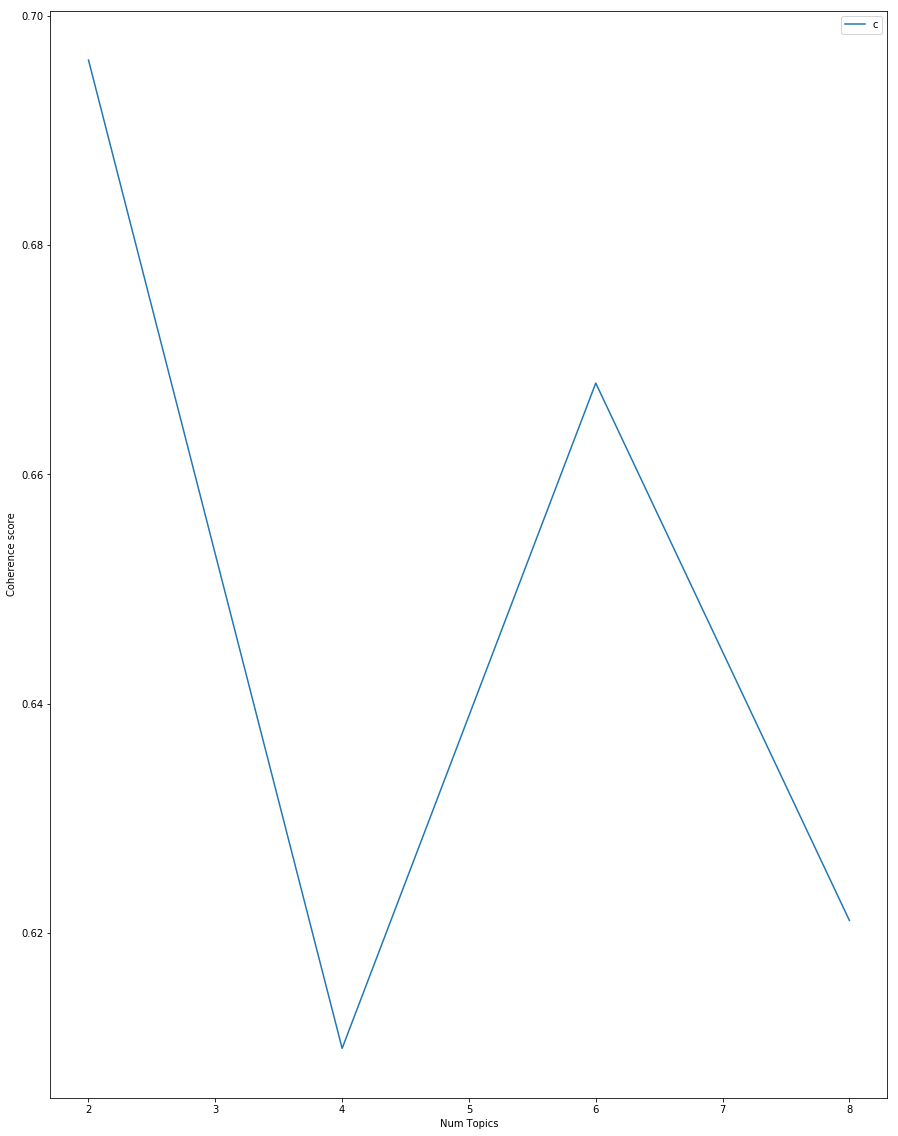

In [103]:
limit=10
start=2
step=2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [104]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv)

Num Topics = 2  has Coherence Value of 0.6961654037569368
Num Topics = 4  has Coherence Value of 0.6099171370358903
Num Topics = 6  has Coherence Value of 0.6679730704102315
Num Topics = 8  has Coherence Value of 0.621081534245353
